In [ ]:
 !pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.0 MB/s eta 0:00:00


In [ ]:
pip install wandb

In [ ]:
import wandb
import math
import random
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

Dataset URL: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews
License(s): Attribution 4.0 International (CC BY 4.0)
 97% 143M/147M [00:02<00:00, 73.5MB/s]
100% 147M/147M [00:02<00:00, 60.6MB/s]


In [ ]:
!unzip sephora-products-and-skincare-reviews.zip

Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [ ]:
import pandas as pd

df= pd.read_csv('reviews_0-250.csv')
df = df.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])

#df = df[df['brand_name'] == 'The Ordinary']


<ipython-input-10-d21899acafb8>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('reviews_0-250.csv')


In [ ]:
df.head(10)

,rating,review_text,brand_name
0,5,I use this with the Nudestix “Citrus Clean Bal...,NUDESTIX
1,1,I bought this lip mask after reading the revie...,LANEIGE
2,5,My review title says it all! I get so excited ...,LANEIGE
3,5,I’ve always loved this formula for a long time...,LANEIGE
4,5,"If you have dry cracked lips, this is a must h...",LANEIGE
5,4,The scent isn’t my favourite but it works grea...,LANEIGE
6,2,I’ll give this 2 stars for nice packaging and ...,LANEIGE
7,5,I use this at night or while I’m putting makeu...,LANEIGE
8,5,I love this stuff. I first had the sample size...,LANEIGE
9,5,I purchased the Sweet Candy scent at my local ...,LANEIGE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   rating       602130 non-null  int64 
 1   review_text  601131 non-null  object
 2   brand_name   602130 non-null  object
dtypes: int64(1), object(2)
memory usage: 13.8+ MB


In [ ]:
df.describe()

,rating
count,602130.000000
mean,4.311838
std,1.143692
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# First, map the 'rating' to the desired labels
df['label'] = df['rating'].apply(lambda x: 0 if x in [1,2] else (1 if x == 3 else 2))

df.head()


,rating,review_text,brand_name,label
0,5,I use this with the Nudestix “Citrus Clean Bal...,NUDESTIX,2
1,1,I bought this lip mask after reading the revie...,LANEIGE,0
2,5,My review title says it all! I get so excited ...,LANEIGE,2
3,5,I’ve always loved this formula for a long time...,LANEIGE,2
4,5,"If you have dry cracked lips, this is a must h...",LANEIGE,2


In [ ]:
df['label'].value_counts()

,count
label,
2,495956
0,62156
1,44018


In [ ]:
df2 = pd.read_csv('reviews_250-500.csv')
df2['label'] = df2['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df2 = df2.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])

#df2 = df2[df2['brand_name'] == 'The Ordinary']


df2.head()

,rating,review_text,brand_name,label
0,2,Used to swear by this product but hate the sme...,The INKEY List,0
1,5,I’ve only been using this for a week and my sk...,The INKEY List,2
2,1,"Why, why, why would you change the formula?!!!...",The INKEY List,0
3,1,I have used this product for years and it has ...,The INKEY List,0
4,5,Great product for anti-aging Also great for da...,The INKEY List,2


In [ ]:
df3 = pd.read_csv('reviews_500-750.csv')
df3['label'] = df3['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df3= df3.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])

#df3 = df3[df3['brand_name'] == 'The Ordinary']

df3.head()

,rating,review_text,brand_name,label
0,5,These are the only pimple patches I’ve used th...,Dr. Jart+,2
1,4,One of my ingrown hair turned inflamed and sor...,Dr. Jart+,2
2,5,I have tried 10 different acne/blemish patches...,Dr. Jart+,2
3,4,"Love these for my mid-size breakouts, specifyi...",Dr. Jart+,2
4,4,Best so far - though still not particularly ef...,Dr. Jart+,2


In [ ]:
df4 = pd.read_csv('reviews_750-1250.csv')
df4['label'] = df4['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df4= df4.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])

#df4 = df4[df4['brand_name'] == 'The Ordinary']

df4.head()

<ipython-input-18-fff4719db932>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('reviews_750-1250.csv')


,rating,review_text,brand_name,label
0,2,This was gifted by Supergoop! in exchange for ...,Supergoop!,0
1,2,I didn’t like it; too much product comes out w...,Supergoop!,0
2,5,Y’all….I’m begging for everyone to read instru...,Supergoop!,2
3,1,I have not figured out how to use this product...,Supergoop!,0
4,1,I’m at a loss as to how to use this thing!!! C...,Supergoop!,0


In [ ]:
df5 = pd.read_csv('reviews_1250-end.csv')
df5['label'] = df5['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df5= df5.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])

#df5 = df5[df5['brand_name'] == 'The Ordinary']

df5.head()

<ipython-input-19-de2da8ccf083>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('reviews_1250-end.csv')


,rating,review_text,brand_name,label
0,5,I absolutely L-O-V-E this oil. I have acne pro...,Clarins,2
1,3,I gave this 3 stars because it give me tiny li...,Clarins,1
2,5,Works well as soon as I wash my face and pat d...,Clarins,2
3,5,"this oil helped with hydration and breakouts, ...",Clarins,2
4,5,This is my first product review ever so that s...,Clarins,2


In [ ]:
# concatenate df,df2,df3,df4,df5
df_concat = pd.concat([df,df2,df3,df4,df5], axis = 0)

# get only neutral labels which we are short of'

df_neut = df_concat[df_concat['label'] == 1]
df_neut.label.value_counts()

,count
label,
1,81816


In [ ]:
df = df_concat
print("Positive labels percentage", round(df.label.value_counts()[2]/len(df) *100 ,2), "%")
print("Negative labels percentage", round(df.label.value_counts()[0]/len(df) *100 ,2), "%")
print("Neutral labels percentage", round(df.label.value_counts()[1]/len(df) *100 ,2), "%")

Positive labels percentage 82.08 %
Negative labels percentage 10.44 %
Neutral labels percentage 7.48 %


In [ ]:
##df_neut = df[df['label'] == 1]
##df_pos = df[df['label'] == 2]
##df_neg = df[df['label'] == 0]

df_neut = df[df['label'] == 1]
df_pos = df[df['label'] == 2].sample(len(df_neut)) # samples a number of rows equal to the length of df_neut
df_neg = df[df['label'] == 0].sample(len(df_neut)) # samples a number of rows equal to the length of df_neut

In [ ]:
df_neg.label.value_counts()

,count
label,
0,81816


In [ ]:
df_pos.label.value_counts()

,count
label,
2,81816


In [ ]:
df_neut.label.value_counts()

,count
label,
1,81816


In [ ]:
from sklearn.utils import shuffle
df = pd.concat([df_pos, df_neg, df_neut], axis = 0)
df = shuffle(df)
df.head()

,rating,review_text,brand_name,label
79236,1,"Honestly, I don’t see the hype. I used this pr...",Youth To The People,0
143902,3,Its just ok. Not my favorite exfoliating clean...,Murad,1
70082,1,I had such high hopes. it broke my skin out li...,Drunk Elephant,0
83256,5,I am in complete AH of this! It’s helped me fe...,Dermalogica,2
86969,5,I loved these eye gels so much. The colloidal ...,BeautyBio,2


In [ ]:
# Mapping dictionary for label names
label_name_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Create the 'label_name' column by mapping the 'label' column
df['label_name'] = df['label'].map(label_name_mapping)

# Check the result
df.head()

,rating,review_text,brand_name,label,label_name
79236,1,"Honestly, I don’t see the hype. I used this pr...",Youth To The People,0,negative
143902,3,Its just ok. Not my favorite exfoliating clean...,Murad,1,neutral
70082,1,I had such high hopes. it broke my skin out li...,Drunk Elephant,0,negative
83256,5,I am in complete AH of this! It’s helped me fe...,Dermalogica,2,positive
86969,5,I loved these eye gels so much. The colloidal ...,BeautyBio,2,positive


In [ ]:
df

,rating,review_text,brand_name,label,label_name
79236,1,"Honestly, I don’t see the hype. I used this pr...",Youth To The People,0,negative
143902,3,Its just ok. Not my favorite exfoliating clean...,Murad,1,neutral
70082,1,I had such high hopes. it broke my skin out li...,Drunk Elephant,0,negative
83256,5,I am in complete AH of this! It’s helped me fe...,Dermalogica,2,positive
86969,5,I loved these eye gels so much. The colloidal ...,BeautyBio,2,positive
...,...,...,...,...,...
18642,1,"This really dries my skin out, but doesn’t tot...",CLINIQUE,0,negative
257216,5,I never thought I would spend 26 dollars on li...,fresh,2,positive
32569,5,One day as i was shopping for makeup downtown(...,Josie Maran,2,positive
85870,2,It was moisturizing but really didn’t do much ...,Skinfix,0,negative


# **TEXT PREPROCESSING**

In [ ]:
## 1. Lower all cases
df['review_text'] = df['review_text'].str.lower()

In [ ]:
df.head()

,rating,review_text,brand_name,label,label_name
79236,1,"honestly, i don’t see the hype. i used this pr...",Youth To The People,0,negative
143902,3,its just ok. not my favorite exfoliating clean...,Murad,1,neutral
70082,1,i had such high hopes. it broke my skin out li...,Drunk Elephant,0,negative
83256,5,i am in complete ah of this! it’s helped me fe...,Dermalogica,2,positive
86969,5,i loved these eye gels so much. the colloidal ...,BeautyBio,2,positive


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
df['review_text'] = df['review_text'].fillna('')

In [ ]:
# ## Removing special characters
df['review_text'] = df['review_text'].apply(lambda x:re.sub('[^a-z A-Z 0-9]+', '', x))
# ## Removing stopwords
df['review_text'] = df['review_text'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
# ## Removing urls
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',str(x)))
# ## Removing html tags
df['review_text'] = df['review_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
# ## Removing any additional spaces
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x.split()))


In [ ]:
df.head()

,rating,review_text,brand_name,label,label_name
79236,1,honestly dont see hype used product 2 months r...,Youth To The People,0,negative
143902,3,ok favorite exfoliating cleanser didnt see maj...,Murad,1,neutral
70082,1,high hopes broke skin like crazy gave super we...,Drunk Elephant,0,negative
83256,5,complete ah helped feel confident appreciate s...,Dermalogica,2,positive
86969,5,loved eye gels much colloidal silver eye masks...,BeautyBio,2,positive


In [ ]:
## Lemmatizer
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: lemmatize_words(x))

In [ ]:
df

,rating,review_text,brand_name,label,label_name
79236,1,honestly dont see hype used product 2 month re...,Youth To The People,0,negative
143902,3,ok favorite exfoliating cleanser didnt see maj...,Murad,1,neutral
70082,1,high hope broke skin like crazy gave super wei...,Drunk Elephant,0,negative
83256,5,complete ah helped feel confident appreciate s...,Dermalogica,2,positive
86969,5,loved eye gel much colloidal silver eye mask r...,BeautyBio,2,positive
...,...,...,...,...,...
18642,1,really dry skin doesnt totally clear pimple al...,CLINIQUE,0,negative
257216,5,never thought would spend 26 dollar lip balm l...,fresh,2,positive
32569,5,one day shopping makeup downtownsoho saw worke...,Josie Maran,2,positive
85870,2,moisturizing really didnt much anything tell,Skinfix,0,negative


# **VISUALIZATION OF MY DATA**

In [ ]:
import matplotlib.pyplot as plt

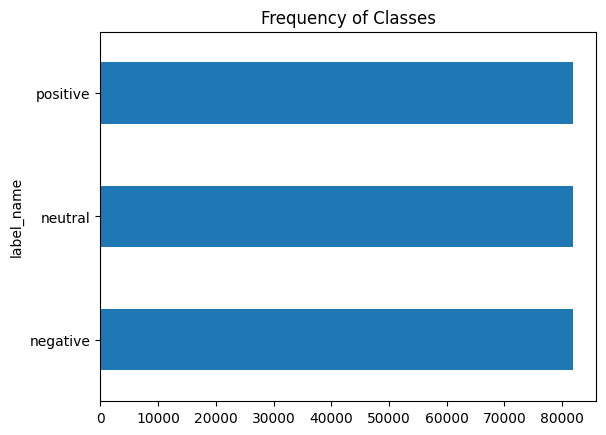

In [ ]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

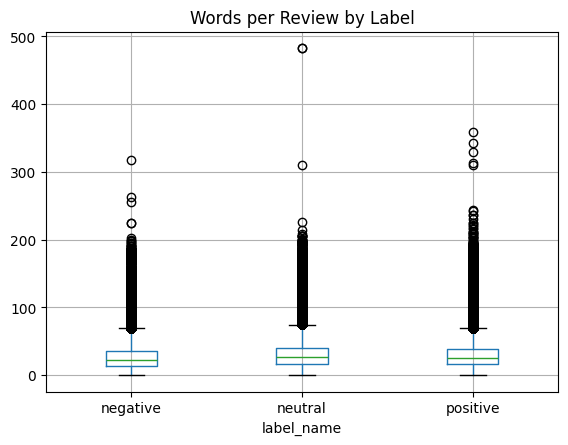

In [ ]:

df['Words per review'] = df['review_text'].fillna('').str.split().apply(len)

# Plot the boxplot
df.boxplot("Words per review", by="label_name")
plt.title("Words per Review by Label")
plt.suptitle("")  # Suppress the default title
plt.show()

# **BERT**

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
print("NaN values in label_name:", df['label_name'].isnull().sum())
print("NaN values in review_text:", df['review_text'].isnull().sum())

NaN values in label_name: 0
NaN values in review_text: 0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, stratify =df['label_name'])
test, validation = train_test_split(test, test_size=1/3,stratify =test['label_name'])

train.shape, test.shape, validation.shape

((171813, 6), (49090, 6), (24545, 6))

In [ ]:
from datasets import Dataset, DatasetDict
dataset = DatasetDict(
    {'train': Dataset.from_pandas(train, preserve_index=False),
     'test': Dataset.from_pandas(test,preserve_index=False),
      'validation': Dataset.from_pandas(validation,preserve_index=False)
    }
)
dataset

DatasetDict({
    train: Dataset({
        features: ['rating', 'review_text', 'brand_name', 'label', 'label_name', 'Words per review'],
        num_rows: 171813
    })
    test: Dataset({
        features: ['rating', 'review_text', 'brand_name', 'label', 'label_name', 'Words per review'],
        num_rows: 49090
    })
    validation: Dataset({
        features: ['rating', 'review_text', 'brand_name', 'label', 'label_name', 'Words per review'],
        num_rows: 24545
    })
})

In [ ]:
dataset['train'][0]

{'rating': 3,
 'review_text': 'really want love one big plus helped breakout ton dry skin review dry skin awesome feel like strip skin double facial oil moisturizer afterward also got red dry flaky patch eyelid put remove makeup sensitive skin didnt realize would cause reaction like im sad really wanted love skin dry sensitive still hunt perfect cleanser',
 'brand_name': 'Farmacy',
 'label': 1,
 'label_name': 'neutral',
 'Words per review': 54}

In [ ]:

def tokenize(batch):
  temp = tokenizer(batch['review_text'], padding=True, truncation=True, max_length=512)
  return temp

print(tokenize(dataset['train'][:2]))


{'input_ids': [[0, 20982, 236, 657, 65, 380, 2704, 1147, 17086, 4866, 3841, 3024, 1551, 3841, 3024, 6344, 619, 101, 9572, 3024, 1457, 11560, 681, 29030, 6315, 14723, 67, 300, 1275, 3841, 2342, 18162, 9202, 26635, 808, 342, 3438, 7855, 5685, 3024, 46405, 4883, 74, 1303, 4289, 101, 4356, 5074, 269, 770, 657, 3024, 3841, 5685, 202, 8131, 1969, 30317, 254, 2], [0, 179, 5282, 8458, 4520, 225, 2295, 6353, 46405, 2045, 319, 2295, 269, 1275, 1825, 2295, 3359, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
import pandas as pd
sentiment_encoded = dataset.map(tokenize, batched=True, batch_size=16)



Map:   0%|          | 0/171813 [00:00<?, ? examples/s]

Map:   0%|          | 0/49090 [00:00<?, ? examples/s]

Map:   0%|          | 0/24545 [00:00<?, ? examples/s]

In [ ]:
#label2id, id2label
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'neutral': 1, 'positive': 2, 'negative': 0},
 {1: 'neutral', 2: 'positive', 0: 'negative'})

In [ ]:
from transformers import AutoModel, AutoModelForSequenceClassification
import torch

In [ ]:
model = AutoModel.from_pretrained(model_ckpt)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.id2label
model.config


RobertaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,config=config).to(device)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "roberta_base_train_dir"
gradient_accumulation_steps = 2
training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=5,
    learning_rate=3e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_dir="logs",
    gradient_accumulation_steps=gradient_accumulation_steps,
    fp16=True,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis = 1)
  return accuracy.compute(predictions=predictions, references=labels)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)

  return{"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=sentiment_encoded['train'],
    eval_dataset=sentiment_encoded['validation'],
    tokenizer=tokenizer
)

<ipython-input-62-5c37517777e8>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: nehat12807 (nehat12807-dow-university-of-health-sciences). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.046300,0.498245,0.787737,0.787354
2,0.916300,0.486236,0.799633,0.798226
3,0.820000,0.479344,0.805052,0.803410
4,0.703800,0.482986,0.808678,0.809642
5,0.625700,0.509739,0.808067,0.808610


TrainOutput(global_step=13425, training_loss=0.8461568492129307, metrics={'train_runtime': 8575.2422, 'train_samples_per_second': 100.18, 'train_steps_per_second': 1.566, 'total_flos': 9.177226990815355e+16, 'train_loss': 0.8461568492129307, 'epoch': 5.0})

In [ ]:
preds_output = trainer.predict(sentiment_encoded['test'])
preds_output.metrics

{'test_loss': 0.48745980858802795,
 'test_accuracy': 0.8069464249337951,
 'test_f1': 0.8078833697621028,
 'test_runtime': 81.3215,
 'test_samples_per_second': 603.653,
 'test_steps_per_second': 18.876}

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = sentiment_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for BERT:\n", classification_report(y_true, y_pred))

Classification Report for BERT:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79     16363
           1       0.71      0.76      0.73     16364
           2       0.90      0.89      0.90     16363

    accuracy                           0.81     49090
   macro avg       0.81      0.81      0.81     49090
weighted avg       0.81      0.81      0.81     49090



In [ ]:
label2id

{'neutral': 1, 'positive': 2, 'negative': 0}

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

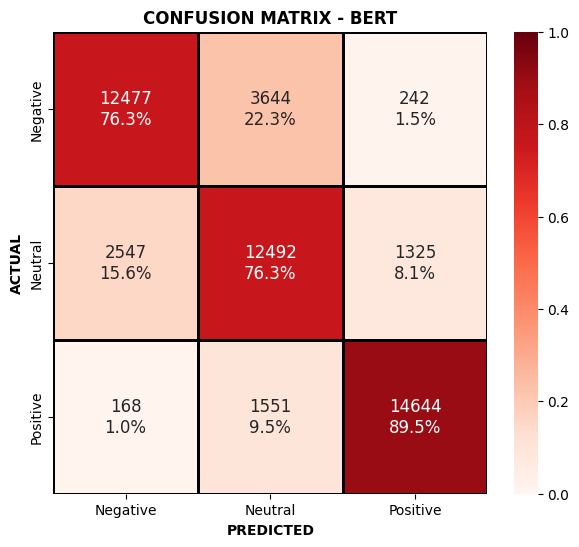

In [ ]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize per row

# Create labels with both value and percentage
labels = [f"{v}\n{p:.1%}" for v, p in zip(cm.flatten(), cm_normalized.flatten())]
labels = np.array(labels).reshape(cm.shape)


tick_labels = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_normalized, annot=labels, fmt='', annot_kws={"size": 12},
            xticklabels=tick_labels, yticklabels=tick_labels,
            cmap='Reds', cbar=True, vmin=0, vmax=1, linewidths=1, linecolor='black')


plt.title("CONFUSION MATRIX - BERT", fontweight='bold')
plt.ylabel("ACTUAL", fontweight='bold')
plt.xlabel("PREDICTED", fontweight='bold')


# Display the plot
plt.show()


In [ ]:
#Took a review from the dataset with 5 rating
text = "I use this with the Nudestix â€œCitrus Clean Balm & Make-Up Meltâ€œ to double cleanse and it has completely changed my skin (for the better). The make-up melt is oil based and removes all of your makeup super easily. I follow-up with this water based cleanser, and I also use this just by itself when Iâ€™m not wearing make-up. It leaves the skin gently cleansed, but without stripping the skin. 10/10 recommend combining with the make-up melt. Itâ€™s perfection!"
def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors='pt').to(device)

  with torch.no_grad():
    outputs = model(**input_encoded)

  logits = outputs.logits

  pred = torch.argmax(logits, dim=1).item()
  return id2label[pred]

get_prediction(text)  #Expected output: Positive

'positive'

In [ ]:
trainer.save_model("bert-base-encased-sentiment-model")

# **MAKING PREDICTIONS USING MY BERT TRAINED MODEL**

In [ ]:
from transformers import pipeline

classifier = pipeline('text-classification', model= 'bert-base-encased-sentiment-model')

reviews = [
    # Positive Reviews
    "This moisturizer leaves my skin so soft and supple. Love it!",  # Positive
    "The serum worked wonders for my dull skin; I’m glowing!",  # Positive
    "After using this product, my fine lines have visibly reduced.",  # Positive
    "It’s gentle, effective, and smells amazing. Highly recommend!",  # Positive
    "My sensitive skin loves this cream. No breakouts, just hydration.",  # Positive
    "The sunscreen is lightweight and doesn’t leave a white cast.",  # Positive
    "This cleanser leaves my skin feeling so fresh and clean.",  # Positive
    "Amazing results after just two weeks of using this mask.",  # Positive
    "Feels luxurious on the skin and delivers on its promises.",  # Positive
    "Hydrates my skin all day without feeling greasy. Perfect!",  # Positive

    # Neutral Reviews
    "It’s fine, but I’ve used better products at a lower price.",  # Neutral
    "The texture is nice, but I haven't noticed any major changes yet.",  # Neutral
    "It’s an okay moisturizer; nothing remarkable but does the job.",  # Neutral
    "Decent product, but the scent is a bit strong for me.",  # Neutral
    "The packaging is nice, but I’m not sure about its effectiveness.",  # Neutral
    "It’s just an average cleanser. No complaints but no wow factor.",  # Neutral
    "Feels nice on the skin, but it’s too early to see results.",  # Neutral
    "Good for basic hydration, but not suitable for very dry skin.",  # Neutral

    # Negative Reviews
    "This cream caused redness and irritation on my face.",  # Negative
    "The product feels heavy and clogs my pores. Wouldn’t buy again.",  # Negative
    "Didn’t help with my acne as promised. Quite disappointing.",  # Negative
    "The fragrance is overpowering and unpleasant.",  # Negative
    "Left my skin dry and flaky after just one use.",  # Negative
    "Overpriced for what it offers. Not worth the money.",  # Negative
    "The toner stings and made my skin feel tight and uncomfortable.",  # Negative
    "I broke out badly after using this serum. Avoid if you have sensitive skin.",  # Negative
    "The texture is greasy, and it doesn’t absorb well.",  # Negative
    "The product did nothing for my skin concerns. Waste of money."  # Negative
]

results = classifier(reviews)

for review, result in zip(reviews, results):
    print(f"Review: {review}\nSentiment: {result}\n")

Device set to use cuda:0


Review: This moisturizer leaves my skin so soft and supple. Love it!
Sentiment: {'label': 'positive', 'score': 0.99458909034729}

Review: The serum worked wonders for my dull skin; I’m glowing!
Sentiment: {'label': 'positive', 'score': 0.9932355284690857}

Review: After using this product, my fine lines have visibly reduced.
Sentiment: {'label': 'positive', 'score': 0.990023672580719}

Review: It’s gentle, effective, and smells amazing. Highly recommend!
Sentiment: {'label': 'positive', 'score': 0.9972002506256104}

Review: My sensitive skin loves this cream. No breakouts, just hydration.
Sentiment: {'label': 'positive', 'score': 0.9893536567687988}

Review: The sunscreen is lightweight and doesn’t leave a white cast.
Sentiment: {'label': 'positive', 'score': 0.9331287145614624}

Review: This cleanser leaves my skin feeling so fresh and clean.
Sentiment: {'label': 'positive', 'score': 0.9806374311447144}

Review: Amazing results after just two weeks of using this mask.
Sentiment: {'lab

# **ERROR ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np


y_pred = np.argmax(preds_output.predictions, axis=1)  # Predicted labels
y_true = sentiment_encoded['test'][:]['label']        # True labels


test_texts = sentiment_encoded['test'][:]['review_text']


df_misclassified = pd.DataFrame({
    'review_text': test_texts,
    'true_label': y_true,
    'predicted_label': y_pred
})


df_misclassified = df_misclassified[df_misclassified['true_label'] != df_misclassified['predicted_label']]


print("Misclassified Reviews:")
print(df_misclassified)

df_misclassified.head(100).to_excel('misclassified_reviews_100.xlsx', index=False)
print("First 100 misclassified reviews saved to 'misclassified_reviews_100.xlsx'.")



Misclassified Reviews:
                                             review_text  true_label  \
7      received sephora play box excited try ive hear...           0   
19     saw tiktok summer friday lip balm excited try ...           1   
20     formula feel light weight skin packaging super...           0   
21     see result month half using back drawing board...           0   
24     cream consistency paste like really great mois...           0   
...                                                  ...         ...   
49062  really excited toner fell flat given cleanse f...           1   
49063  great moisturizer okay wanted try something di...           0   
49082  good combination skinneed buy discount price o...           2   
49083  product puzzle package absolutely beautiful pr...           0   
49085  always hard time finding product get rid help ...           1   

       predicted_label  
7                    1  
19                   0  
20                   1  
21          

In [ ]:
from google.colab import files

files.download('misclassified_reviews_100.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>